## Library

In [193]:
## 레이어
from keras.layers import Input, Lambda, Dense, Flatten

## 모델
from keras.models import Model

# VGG 
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# InceptionV3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

# ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet50

# Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# predict display
import tensorflow as tf
import cv2
from tensorflow.python.keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

# Sequential model and layer
from keras.models import Sequential
from keras import layers, models
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras import optimizers, initializers, regularizers, metrics

# filesystem
import numpy as np
from glob import glob

# visualization
import matplotlib.pyplot as plt

# early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [642]:
custom_model_namelist = ["custom_VGG16", "custom_InceptionV3","custom_ResNet50"]
model_namelist = ["VGG16","InceptionV3","ResNet50"]

# 전처리

In [594]:
# resize image
IMAGE_SIZE =[224,224]

train_path = 'tunnel_dataset/train' # tunnel
valid_path = 'tunnel_dataset/test' # tunnel

# useful for getting number of classes
folders = glob('tunnel_dataset/train/*') # tunnel
folders

['tunnel_dataset/train/normal',
 'tunnel_dataset/train/accident',
 'tunnel_dataset/train/fire']

In [595]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# class set
training_set = train_datagen.flow_from_directory('tunnel_dataset/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# class set
test_set = test_datagen.flow_from_directory('tunnel_dataset/test',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2880 images belonging to 3 classes.
Found 721 images belonging to 3 classes.


# 모델생성

In [35]:
# our layers - you can add more if you want
# vgg_flatten = Flatten()(vgg.output)


In [596]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights = 'imagenet',include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    

# add preprocessing layer to the front of InceptionV3    
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights = 'imagenet',include_top=False)

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False
    
# add preprocessing layer to the front of ResNet50
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights = 'imagenet',include_top=False)
for layer in resnet.layers:
    layer.trainable = False   


In [597]:
def transfer_model(tf_model):
    prediction = Dense(len(folders), activation='softmax')
    model = models.Sequential()
    model.add(tf_model)
    model.add(layers.Flatten())
    model.add(prediction)

    model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
    )
    
    return model

In [598]:
vgg_model = transfer_model(vgg)
inception_model = transfer_model(inception)
resnet_model = transfer_model(resnet)

In [599]:
# vgg_model.fit
epochs_to_wait_improve=3
model_name = 'model_test/tunnel_{}model.h5'.format(model_namelist[0])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=epochs_to_wait_improve)
checkpoint_callback = ModelCheckpoint(model_name, monitor='val_loss',verbose=1, save_best_only=True,mode='min')

vgg_tunnel = vgg_model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early_stopping_callback, checkpoint_callback] # 이벤트에 의해 호출되어지는 함수 
)

Epoch 1/50
90/90 [==============================] - 27s 291ms/step - loss: 0.9346 - accuracy: 0.6683 - val_loss: 0.3096 - val_accuracy: 0.8724

Epoch 00001: val_loss improved from inf to 0.30958, saving model to model_test/tunnel_VGG16model.h5
Epoch 2/50
90/90 [==============================] - 25s 275ms/step - loss: 0.2055 - accuracy: 0.9240 - val_loss: 0.2217 - val_accuracy: 0.9196

Epoch 00002: val_loss improved from 0.30958 to 0.22174, saving model to model_test/tunnel_VGG16model.h5
Epoch 3/50
90/90 [==============================] - 25s 274ms/step - loss: 0.1438 - accuracy: 0.9526 - val_loss: 0.2379 - val_accuracy: 0.9126

Epoch 00003: val_loss did not improve from 0.22174
Epoch 4/50
90/90 [==============================] - 25s 274ms/step - loss: 0.1207 - accuracy: 0.9580 - val_loss: 0.2355 - val_accuracy: 0.9154

Epoch 00004: val_loss did not improve from 0.22174
Epoch 5/50
90/90 [==============================] - 25s 277ms/step - loss: 0.0910 - accuracy: 0.9722 - val_loss: 0.231

In [600]:
# inception_model.fit
epochs_to_wait_improve=3
model_name = 'model_test/tunnel_{}model.h5'.format(model_namelist[1])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=epochs_to_wait_improve)
checkpoint_callback = ModelCheckpoint(model_name, monitor='val_loss',verbose=1, save_best_only=True,mode='min')

inception_tunnel = inception_model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early_stopping_callback, checkpoint_callback] # 이벤트에 의해 호출되어지는 함수 
)

Epoch 1/50
90/90 [==============================] - 29s 287ms/step - loss: 3.4531 - accuracy: 0.7791 - val_loss: 0.8146 - val_accuracy: 0.9223

Epoch 00001: val_loss improved from inf to 0.81462, saving model to model_test/tunnel_InceptionV3model.h5
Epoch 2/50
90/90 [==============================] - 25s 272ms/step - loss: 0.7660 - accuracy: 0.9198 - val_loss: 0.8260 - val_accuracy: 0.9140

Epoch 00002: val_loss did not improve from 0.81462
Epoch 3/50
90/90 [==============================] - 25s 273ms/step - loss: 0.6058 - accuracy: 0.9381 - val_loss: 0.7718 - val_accuracy: 0.9209

Epoch 00003: val_loss improved from 0.81462 to 0.77185, saving model to model_test/tunnel_InceptionV3model.h5
Epoch 4/50
90/90 [==============================] - 24s 271ms/step - loss: 0.2616 - accuracy: 0.9565 - val_loss: 1.4583 - val_accuracy: 0.8807

Epoch 00004: val_loss did not improve from 0.77185
Epoch 5/50
90/90 [==============================] - 25s 274ms/step - loss: 0.2182 - accuracy: 0.9684 - val

In [601]:
# resnet_model.fit
epochs_to_wait_improve=3
model_name = 'model_test/tunnel_{}model.h5'.format(model_namelist[2])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=epochs_to_wait_improve)
checkpoint_callback = ModelCheckpoint(model_name, monitor='val_loss',verbose=1, save_best_only=True,mode='min')

resnet_tunnel = resnet_model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early_stopping_callback, checkpoint_callback] # 이벤트에 의해 호출되어지는 함수 
)

Epoch 1/50
90/90 [==============================] - 28s 289ms/step - loss: 2.8238 - accuracy: 0.4975 - val_loss: 0.7430 - val_accuracy: 0.7476

Epoch 00001: val_loss improved from inf to 0.74296, saving model to model_test/tunnel_ResNet50model.h5
Epoch 2/50
90/90 [==============================] - 25s 272ms/step - loss: 0.6648 - accuracy: 0.7329 - val_loss: 0.7260 - val_accuracy: 0.7379

Epoch 00002: val_loss improved from 0.74296 to 0.72597, saving model to model_test/tunnel_ResNet50model.h5
Epoch 3/50
90/90 [==============================] - 25s 275ms/step - loss: 0.6428 - accuracy: 0.7425 - val_loss: 0.7110 - val_accuracy: 0.7531

Epoch 00003: val_loss improved from 0.72597 to 0.71099, saving model to model_test/tunnel_ResNet50model.h5
Epoch 4/50
90/90 [==============================] - 25s 274ms/step - loss: 0.6773 - accuracy: 0.7623 - val_loss: 0.7576 - val_accuracy: 0.7143

Epoch 00004: val_loss did not improve from 0.71099
Epoch 5/50
90/90 [==============================] - 25s 

## 모델평가 

In [101]:
def model_evaluate(model, model_name):
    scores = model.evaluate_generator(test_set,steps=len(test_set))
    print(model_name,"%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [632]:
model_evaluate(vgg_model,model_name_list[0])
print()

model_evaluate(inception_model,model_name_list[1])
print()

model_evaluate(resnet_model,model_name_list[2])

VGG16 accuracy: 91.96%

Inception_V3 accuracy: 90.29%

ResNet50 accuracy: 78.50%


## 레이어 추가 모델

In [607]:
# functional
def vgg_cnn():
   # add preprocessing layer to the front of VGG
    vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights = 'imagenet',include_top=False)
    
    # don't train existing weights
    for layer in vgg.layers:
        layer.trainable = False
    
    # output layer 
    x = Flatten()(vgg.layers[-1].output)
    dense = Dense(512, input_dim = 1, activation='relu')(x)
    dropout = Dropout(0.3)(dense)
    output = Dense(len(folders), activation='softmax')(dropout)
    
    model = Model(inputs=vgg.inputs, outputs=output, name='vgg_cnn')
    
    return model

In [608]:
# functional
def inception_cnn():
   # add preprocessing layer to the front of VGG
    inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights = 'imagenet',include_top=False)
    
    # don't train existing weights
    for layer in inception.layers:
        layer.trainable = False
    
    # output layer
    x = Flatten()(inception.layers[-1].output)
    dense = Dense(2048, input_dim = 1, activation='relu')(x)
    dropout = Dropout(0.3)(dense)
    output = Dense(len(folders), activation='softmax')(dropout)
    
    model = Model(inputs=inception.inputs, outputs=output, name='vgg_cnn')
    
    return model

In [609]:
# functional
def resnet_cnn():
   # add preprocessing layer to the front of VGG
    resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights = 'imagenet',include_top=False)
    
    # don't train existing weights
    for layer in resnet.layers:
        layer.trainable = False
    
    x = Flatten()(resnet.layers[-1].output)
    dense = Dense(2048, input_dim = 1, activation='relu')(x)
    dropout = Dropout(0.3)(dense)
    output = Dense(len(folders), activation='softmax')(dropout)
    
    model = Model(inputs=resnet.inputs, outputs=output, name='vgg_cnn')
    
    return model
resnet_cnn_model = resnet_cnn()

In [610]:
def compile_train(model, epoch, model_namelist):
    model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
    )
    
    epochs_to_wait_improve=3
    model_name = 'model_test/tunnel_{}model'.format(model_namelist)
    early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=epochs_to_wait_improve)
    checkpoint_callback = ModelCheckpoint(model_name+'.h5', monitor='val_loss',verbose=1, save_best_only=True,mode='min')

    history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=epoch,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early_stopping_callback, checkpoint_callback] # 이벤트에 의해 호출되어지는 함수 
    )
       
    return model , history

In [612]:
vgg_cnn_model = vgg_cnn()
test_vgg_cnn,vgg_hist = compile_train(vgg_cnn_model,50,custom_model_namelist[0])

Epoch 1/50
90/90 [==============================] - 26s 278ms/step - loss: 2.3482 - accuracy: 0.6607 - val_loss: 0.3046 - val_accuracy: 0.8877

Epoch 00001: val_loss improved from inf to 0.30458, saving model to model_test/tunnel_custom_VGG16model.h5
Epoch 2/50
90/90 [==============================] - 25s 276ms/step - loss: 0.2516 - accuracy: 0.9092 - val_loss: 0.3761 - val_accuracy: 0.8558

Epoch 00002: val_loss did not improve from 0.30458
Epoch 3/50
90/90 [==============================] - 25s 275ms/step - loss: 0.2208 - accuracy: 0.9170 - val_loss: 0.2720 - val_accuracy: 0.8960

Epoch 00003: val_loss improved from 0.30458 to 0.27198, saving model to model_test/tunnel_custom_VGG16model.h5
Epoch 4/50
90/90 [==============================] - 25s 275ms/step - loss: 0.1609 - accuracy: 0.9444 - val_loss: 0.2371 - val_accuracy: 0.9182

Epoch 00004: val_loss improved from 0.27198 to 0.23715, saving model to model_test/tunnel_custom_VGG16model.h5
Epoch 5/50
90/90 [==========================

In [613]:
inception_cnn_model = inception_cnn()
test_inception_cnn,inception_hist = compile_train(inception_cnn_model,50, custom_model_namelist[1])

Epoch 1/50
90/90 [==============================] - 29s 284ms/step - loss: 23.6701 - accuracy: 0.7653 - val_loss: 3.4540 - val_accuracy: 0.9085

Epoch 00001: val_loss improved from inf to 3.45401, saving model to model_test/tunnel_custom_InceptionV3model.h5
Epoch 2/50
90/90 [==============================] - 25s 274ms/step - loss: 2.1518 - accuracy: 0.9281 - val_loss: 2.8366 - val_accuracy: 0.8960

Epoch 00002: val_loss improved from 3.45401 to 2.83659, saving model to model_test/tunnel_custom_InceptionV3model.h5
Epoch 3/50
90/90 [==============================] - 25s 272ms/step - loss: 1.5535 - accuracy: 0.9416 - val_loss: 1.7801 - val_accuracy: 0.8835

Epoch 00003: val_loss improved from 2.83659 to 1.78007, saving model to model_test/tunnel_custom_InceptionV3model.h5
Epoch 4/50
90/90 [==============================] - 25s 274ms/step - loss: 0.5421 - accuracy: 0.9485 - val_loss: 0.6726 - val_accuracy: 0.9251

Epoch 00004: val_loss improved from 1.78007 to 0.67259, saving model to mode

In [614]:
resnet_cnn_model = resnet_cnn()
test_resnet_cnn,resnet_hist = compile_train(resnet_cnn_model,50, custom_model_namelist[2])

Epoch 1/50
90/90 [==============================] - 28s 283ms/step - loss: 19.6576 - accuracy: 0.4300 - val_loss: 0.7040 - val_accuracy: 0.7157

Epoch 00001: val_loss improved from inf to 0.70397, saving model to model_test/tunnel_custom_ResNet50model.h5
Epoch 2/50
90/90 [==============================] - 25s 275ms/step - loss: 0.7215 - accuracy: 0.6881 - val_loss: 0.7626 - val_accuracy: 0.6560

Epoch 00002: val_loss did not improve from 0.70397
Epoch 3/50
90/90 [==============================] - 25s 274ms/step - loss: 0.6879 - accuracy: 0.7206 - val_loss: 0.6346 - val_accuracy: 0.7365

Epoch 00003: val_loss improved from 0.70397 to 0.63455, saving model to model_test/tunnel_custom_ResNet50model.h5
Epoch 4/50
90/90 [==============================] - 25s 274ms/step - loss: 0.6857 - accuracy: 0.7167 - val_loss: 0.6718 - val_accuracy: 0.7004

Epoch 00004: val_loss did not improve from 0.63455
Epoch 5/50
90/90 [==============================] - 25s 274ms/step - loss: 0.6794 - accuracy: 0.7

In [615]:
def model_evaluate(model, model_name):
    scores = model.evaluate_generator(test_set,steps=len(test_set))
    print(model_name,"%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [616]:
model_evaluate(test_vgg_cnn,model_name_list[0])
model_evaluate(test_inception_cnn,model_name_list[1])
model_evaluate(test_resnet_cnn,model_name_list[2])

VGG16 accuracy: 91.82%
Inception_V3 accuracy: 92.51%
ResNet50 accuracy: 76.28%


## 앙상블적용

In [423]:
def ensem_eval(models, images, labels):
    predictions = tf.zeros_like(labels)
    for model in models:
        logits = model(images, training=False)
        predictions += logits
        
    correct_prediction = tf.equal(tf.argmax(predictions,1),tf.argmax(labels,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [649]:
custom_model_list = [test_vgg_cnn,test_inception_cnn,resnet_model]

In [650]:
X_test, Y_test = test_set.next()

In [672]:
ensem_eval(custom_model_list,X_test,Y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9375>

In [680]:
result = np.array(ensem_eval(custom_model_list,X_test,Y_test))
result

array(0.9375, dtype=float32)

In [653]:
model_evaluate(test_vgg_cnn,model_name_list[0])
model_evaluate(test_inception_cnn,model_name_list[1])
model_evaluate(test_resnet_cnn,model_name_list[2])

VGG16 accuracy: 91.82%
Inception_V3 accuracy: 92.51%
ResNet50 accuracy: 76.28%


# 예측

In [430]:
import tensorflow as tf
import cv2
from tensorflow.python.keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

In [630]:
tm = tf.keras.models.load_model('model_test/tunnel_custom_InceptionV3model.h5', compile=False)

In [497]:
def tunnel_run_predict(file_path,model):
    image = cv2.imread(file_path)
    image = cv2.resize(image,dsize=(224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
    image = preprocess_input(image)
    yhat = model.predict(image)
    print("accident_accuray : ",yhat[0][0])
    print("fire_accuray : ",yhat[0][1])
    print("normal_accuray : ",yhat[0][2])

accident_accuray :  0.99984014
fire_accuray :  2.2549766e-07
normal_accuray :  0.00015963553


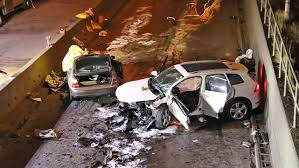

In [536]:
file_path = 'tunnel_dataset/test/accident/accident_crash20.jpg'
tunnel_run_predict(file_path,model_list[0])
Image(file_path) 

accident_accuray :  0.99999976
fire_accuray :  2.8174178e-13
normal_accuray :  1.8666057e-07


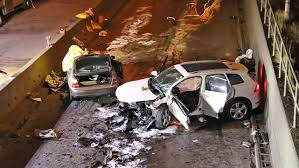

In [631]:
file_path = 'tunnel_dataset/test/accident/accident_crash20.jpg'
tunnel_run_predict(file_path,tm)
Image(file_path) 

accident_accuray :  0.9919304
fire_accuray :  0.0030870603
normal_accuray :  1.2268988e-06


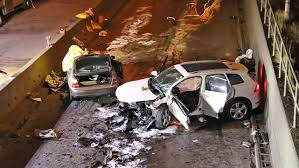

In [629]:
file_path = 'tunnel_dataset/test/accident/accident_crash20.jpg'
tunnel_run_predict(file_path,model_list[2])
Image(file_path) 

## 시각화

In [617]:
def loss_visualization(model, model_name):
    plt.title('LossVal_loss_{}'.format(model_name))
    plt.plot(model.history['loss'],label = 'train_loss')
    plt.plot(model.history['val_loss'],label = 'val_loss')
    plt.legend()
    plt.savefig('learning_result/LossVal_loss_{}'.format(model_name))

def acc_visualization(model,model_name):
    plt.title('AccVal_acc_{}'.format(model_name))
    plt.plot(model.history['accuracy'], label='train acc')
    plt.plot(model.history['val_accuracy'], label='val acc')
    plt.legend()
    plt.savefig('learning_result/AccVal_acc_{}'.format(model_name))

VGG16 accuracy: 91.96%
custom_VGG16 accuracy: 91.82%


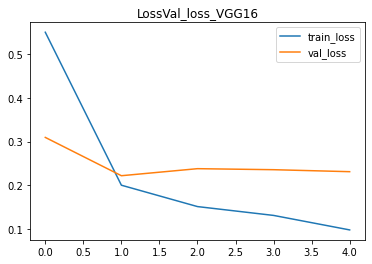

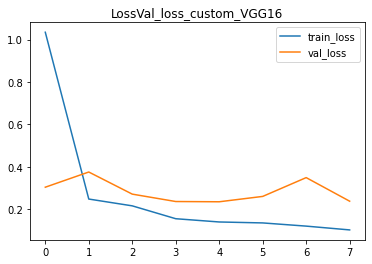

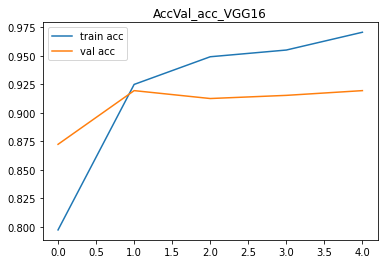

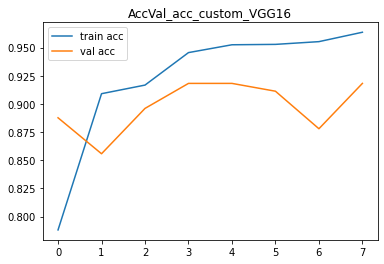

In [619]:
loss_visualization(vgg_tunnel,model_name_list[0])
plt.figure()
loss_visualization(vgg_hist,custom_model_namelist[0])
plt.figure()
acc_visualization(vgg_tunnel,model_name_list[0])
plt.figure()
acc_visualization(vgg_hist,custom_model_namelist[0])
model_evaluate(vgg_model,model_namelist[0])
model_evaluate(test_vgg_cnn,custom_model_namelist[0])

InceptionV3 accuracy: 90.29%
custom_InceptionV3 accuracy: 92.51%


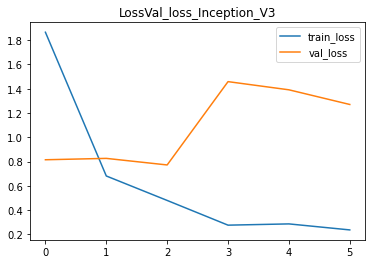

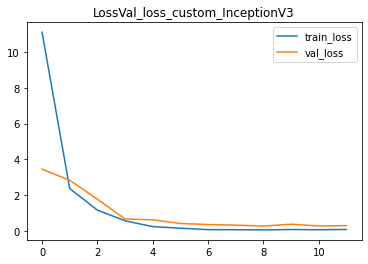

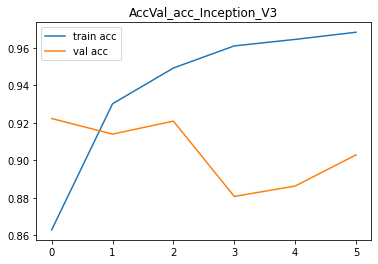

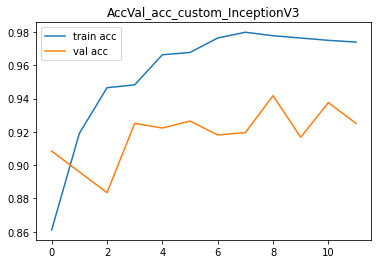

In [624]:
loss_visualization(inception_tunnel,model_name_list[1])
plt.figure()
loss_visualization(inception_hist,custom_model_namelist[1])
plt.figure()
acc_visualization(inception_tunnel,model_name_list[1])
plt.figure()
acc_visualization(inception_hist,custom_model_namelist[1])
model_evaluate(inception_model,model_namelist[1])
model_evaluate(test_inception_cnn,custom_model_namelist[1])

ResNet50 accuracy: 78.50%
custom_ResNet50 accuracy: 76.28%


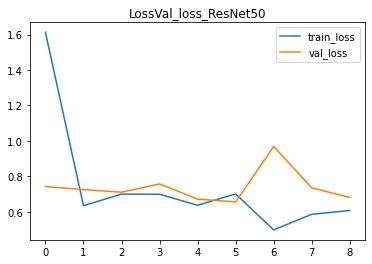

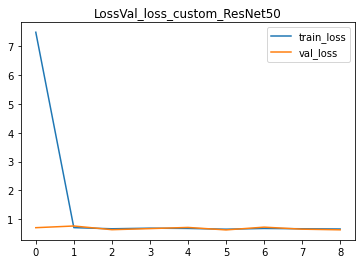

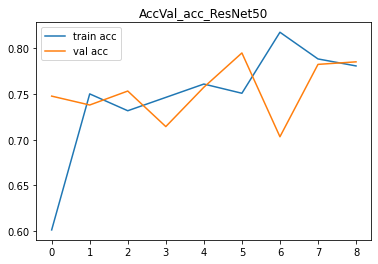

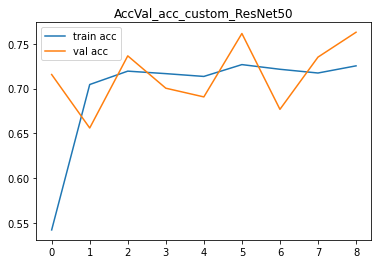

In [621]:
loss_visualization(resnet_tunnel,model_name_list[2])
plt.figure()
loss_visualization(resnet_hist,custom_model_namelist[2])
plt.figure()
acc_visualization(resnet_tunnel,model_name_list[2])
plt.figure()
acc_visualization(resnet_hist,custom_model_namelist[2])
model_evaluate(resnet_model,model_namelist[2])
model_evaluate(test_resnet_cnn,custom_model_namelist[2])